<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект: Определение перспективного тарифа для телеком компании

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание данных**

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что указала цель исследования и описание данных
</div>

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats as st
import math

In [2]:
calls = pd.read_csv("/datasets/calls.csv", delimiter=',')
internet = pd.read_csv("/datasets/internet.csv", delimiter=',')
messages = pd.read_csv("/datasets/messages.csv", delimiter=',')
tariffs = pd.read_csv("/datasets/tariffs.csv", delimiter=',')
users = pd.read_csv("/datasets/users.csv", delimiter=',')

In [3]:
calls.info()
pd.DataFrame(calls).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet.info()
pd.DataFrame(internet).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages.info()
pd.DataFrame(messages).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
tariffs.info()
pd.DataFrame(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users.info()
pd.DataFrame(users).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [8]:
print("Количество дубликатов ", calls.duplicated(keep = False).sum())
print("Количество дубликатов ", users.duplicated(keep = False).sum())
print("Количество дубликатов ", messages.duplicated(keep = False).sum())
print("Количество дубликатов ", internet.duplicated(keep = False).sum())
print("Количество дубликатов ", tariffs.duplicated(keep = False).sum())

Количество дубликатов  0
Количество дубликатов  0
Количество дубликатов  0
Количество дубликатов  0
Количество дубликатов  0


**Вывод 1**

 - *Файлы интегрированы.*
 - *Дубликатов нет.*
 - *Пользователей всего 500*

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>

## Предобработка данных

In [9]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format =  '%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format =  '%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format =  '%Y.%m.%d')

calls.loc[calls['duration'] == 0, 'duration'] = 1

In [10]:
calls['duration'].value_counts(normalize = True)

1.00     0.195951
4.49     0.000701
5.50     0.000701
6.15     0.000696
6.38     0.000696
           ...   
28.49    0.000005
26.16    0.000005
25.76    0.000005
27.26    0.000005
27.63    0.000005
Name: duration, Length: 2870, dtype: float64

**Вывод 2.1**

 - *Убран ненужный столбец*
 - *Изменен формат дат*
 - *Изменено 0 значение по длительности звонков на 1. Нулевая длительность звонков может обозначать либо пропущенные звонки, либо отсутствие информации по определенному звонку. В любом случае для более рационального расчета дальнейшей выручки стоит инзменить 0 значения на 1*

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что изменила типы данных
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Прокомментируй, пожалуйста, почему мы заменяем длительность звонков с нуля на единицу. Это нормальное решение, но его нужно как-то обосновать.
</div>

<div class="alert alert-info">
    
Попыталась обосновать
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что добавила комментарий

</div>



**Уникальные значения**
    


In [11]:
for col in calls:
    print(col)
    print(calls[col].unique())
    print('---------------------------------------------------------------')
    print()

id
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
---------------------------------------------------------------

call_date
['2018-07-25T00:00:00.000000000' '2018-08-17T00:00:00.000000000'
 '2018-06-11T00:00:00.000000000' '2018-09-21T00:00:00.000000000'
 '2018-12-15T00:00:00.000000000' '2018-11-02T00:00:00.000000000'
 '2018-10-18T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-09-15T00:00:00.000000000' '2018-08-15T00:00:00.000000000'
 '2018-05-28T00:00:00.000000000' '2018-07-05T00:00:00.000000000'
 '2018-09-29T00:00:00.000000000' '2018-12-11T00:00:00.000000000'
 '2018-07-27T00:00:00.000000000' '2018-08-11T00:00:00.000000000'
 '2018-08-02T00:00:00.000000000' '2018-06-15T00:00:00.000000000'
 '2018-12-04T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-09-25T00:00:00.000000000' '2018-07-21T00:00:00.000000000'
 '2018-08-27T00:00:00.000000000' '2018-08-25T00:00:00.000000000'
 '2018-12-12T00:00:00.000000000' '2018-07-19T00:00:00.000000000'
 '2018-11-1

In [12]:
print(calls['duration'].value_counts(normalize = True))

1.00     0.195951
4.49     0.000701
5.50     0.000701
6.15     0.000696
6.38     0.000696
           ...   
28.49    0.000005
26.16    0.000005
25.76    0.000005
27.26    0.000005
27.63    0.000005
Name: duration, Length: 2870, dtype: float64


In [13]:
for col in internet:
    print(col)
    print(internet[col].unique())
    print('---------------------------------------------------------------')
    print()

id
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
---------------------------------------------------------------

mb_used
[ 112.95 1052.81 1197.26 ...  460.75  247.59   23.72]
---------------------------------------------------------------

session_date
['2018-11-25T00:00:00.000000000' '2018-09-07T00:00:00.000000000'
 '2018-06-25T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-09-24T00:00:00.000000000' '2018-10-02T00:00:00.000000000'
 '2018-07-11T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-09-03T00:00:00.000000000' '2018-09-27T00:00:00.000000000'
 '2018-08-28T00:00:00.000000000' '2018-06-20T00:00:00.000000000'
 '2018-08-09T00:00:00.000000000' '2018-08-11T00:00:00.000000000'
 '2018-07-21T00:00:00.000000000' '2018-06-09T00:00:00.000000000'
 '2018-06-03T00:00:00.000000000' '2018-11-01T00:00:00.000000000'
 '2018-11-28T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-12-06T00:00:00.000000000' '2018-07-02T00:00:00.000000000'
 '2018-10-1

In [14]:
for col in messages:
    print(col)
    print(messages[col].unique())
    print('---------------------------------------------------------------')
    print()

id
['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
---------------------------------------------------------------

message_date
['2018-06-27T00:00:00.000000000' '2018-10-08T00:00:00.000000000'
 '2018-08-04T00:00:00.000000000' '2018-06-16T00:00:00.000000000'
 '2018-12-05T00:00:00.000000000' '2018-06-20T00:00:00.000000000'
 '2018-11-19T00:00:00.000000000' '2018-10-29T00:00:00.000000000'
 '2018-06-25T00:00:00.000000000' '2018-12-18T00:00:00.000000000'
 '2018-05-30T00:00:00.000000000' '2018-07-06T00:00:00.000000000'
 '2018-08-20T00:00:00.000000000' '2018-10-30T00:00:00.000000000'
 '2018-09-14T00:00:00.000000000' '2018-08-28T00:00:00.000000000'
 '2018-06-29T00:00:00.000000000' '2018-07-07T00:00:00.000000000'
 '2018-05-29T00:00:00.000000000' '2018-05-28T00:00:00.000000000'
 '2018-08-15T00:00:00.000000000' '2018-07-29T00:00:00.000000000'
 '2018-12-07T00:00:00.000000000' '2018-12-25T00:00:00.000000000'
 '2018-10-31T00:00:00.000000000' '2018-07-30T00:00:00.000000000'
 '2018-1

In [15]:
for col in users:
    print(col)
    print(users[col].unique())
    print('---------------------------------------------------------------')
    print()

user_id
[1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 119



**Количество сообщений, звонков и интернета по пользователям и месяцам**
    


In [16]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_count_month = messages.pivot_table(index = ['user_id',  'month'], aggfunc = 'count').reset_index()
messages_count_month = messages_count_month.rename(columns={'message_date': 'message_count'})
messages_count_month.drop('id', axis=1, inplace=True)
pd.DataFrame(messages_count_month)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Давай перед группировкой данных округлим длительность звонков вверх
    
    Из задания:  
    Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
</div>

<div class="alert alert-info">
    
Округлила, с помощью метода math.ceil ничего не вышло, высвечивающиеся ошибки написала
</div>

In [17]:
calls.loc[calls['duration'] != 1, 'duration'] = calls['duration']+1
calls['duration'] = calls['duration'].astype('int')
pd.DataFrame(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

> #calls['duration'] = calls.duration.apply(lambda x: (math.ceil(x))   unexpected EOF while parsing
    
тут ты забыла добавить еще одну закрывающую скобку в конце строки, поэтому возникла ошибка. Кстати, math.ceil можно было передать в apply и без лямбда-функции:  
`calls.duration.apply(math.ceil)`
    
> #calls['duration'] = math.ceil(calls['duration'])      cannot convert the series to <class 'float'>
    
Этот код не будет работать, потому что в math.ceil нужно передать число, а не объект типа pd.Series

</div>

In [18]:
#calls['duration'] = calls.duration.apply(lambda x: (math.ceil(x))   unexpected EOF while parsing
#calls['duration'] = math.ceil(calls['duration'])      cannot convert the series to <class 'float'>

calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_count_month = calls.pivot_table(index = ['user_id',  'month'], 
                                      values = 'duration', aggfunc = ['count', 'sum']).reset_index()
pd.DataFrame(calls_count_month)

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,419
4,1000,9,58,479
...,...,...,...,...
3169,1498,10,41,259
3170,1499,9,9,71
3171,1499,10,68,474


In [19]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_count_month = internet.pivot_table(index = ['user_id',  'month'], 
                                            values = 'mb_used', aggfunc = ['count', 'sum']).reset_index()
pd.DataFrame(internet_count_month)

,user_id,month,count,sum
,,,mb_used,mb_used
0,1000,5,5,2253.49
1,1000,6,49,23233.77
2,1000,7,29,14003.64
3,1000,8,29,14055.93
4,1000,9,27,14568.91
...,...,...,...,...
3198,1498,10,59,20579.36
3199,1499,9,5,1845.75
3200,1499,10,58,17788.51


In [20]:
data = calls_count_month.merge(internet_count_month, on =['user_id', 'month'],how='outer')
data = data.merge(messages_count_month, on =['user_id', 'month'],how='outer')
pd.DataFrame(data)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)
/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,month,"(user_id, )","(month, )","(count, duration)","(sum, duration)","(count, mb_used)","(sum, mb_used)",message_count
0,1000,5,1000,5,22.0,164.0,5.0,2253.49,22.0
1,1000,6,1000,6,43.0,187.0,49.0,23233.77,60.0
2,1000,7,1000,7,47.0,346.0,29.0,14003.64,75.0
3,1000,8,1000,8,52.0,419.0,29.0,14055.93,81.0
4,1000,9,1000,9,58.0,479.0,27.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...
3209,1489,8,1489,8,NaN,NaN,34.0,11050.56,17.0
3210,1489,9,1489,9,NaN,NaN,63.0,17206.30,32.0
3211,1489,10,1489,10,NaN,NaN,63.0,19559.44,21.0
3212,1489,11,1489,11,NaN,NaN,55.0,17491.56,20.0


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Нужно изменить тип соединения таблиц. Сейчас если пользователь пользовался интернетом, но не совершал звонки, он не попадет в твою таблицу (то же самое с сообщениями)
    
Про соединения можешь посмотреть тут https://medium.com/@Lexx01/sql-inner-и-outer-join-64f3862d8540

    
</div>
<div class="alert alert-info">
    
Изменила соединение на outer
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Супер, все верно

</div>


In [21]:
data2 = data.merge(users,how='left', on ='user_id' )
data2.drop('user_id', axis=1, inplace=True)
data2.drop('month', axis=1, inplace=True)
data2.columns = ['user_id', 'month', 'count_duration', 'sum_duration', 'count_mb_used', 'sum_mb_used', 'message_count', 'age',
                 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff']
pd.DataFrame(data2)

,user_id,month,count_duration,sum_duration,count_mb_used,sum_mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,164.0,5.0,2253.49,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,187.0,49.0,23233.77,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,346.0,29.0,14003.64,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,419.0,29.0,14055.93,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,479.0,27.0,14568.91,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,34.0,11050.56,17.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,NaN,63.0,17206.30,32.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,NaN,63.0,19559.44,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,NaN,55.0,17491.56,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart



<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
>  'sum mb_used', 
    
    
Не нужно использовать пробелы в названиях признаков
</div>

<div class="alert alert-info">
    sum_mb_used

</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что изменила название признака
    

</div>


In [22]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
#duration округлено ранее
#data2.loc[data2['sum_duration'] != 1, 'sum_duration'] = data2['sum_duration']+1
#data2['sum_duration'] = data2['sum_duration'].astype('int')

data2['sum_mb_used'] = data2['sum_mb_used'].fillna(0)
data2.loc[data2['sum_mb_used'] != 0, 'sum_mb_used'] = data2['sum_mb_used']+1
data2['sum_mb_used'] = data2['sum_mb_used'].astype('int')

#дополнительные минуты
data2.loc[data2['tariff'] == 'smart', 'dop_calls'] = data2['sum_duration'] - tariffs['minutes_included'][0]
data2.loc[data2['tariff'] == 'ultra', 'dop_calls'] = data2['sum_duration'] - tariffs['minutes_included'][1]

data2.loc[data2['dop_calls'] < 0, 'dop_calls'] = 0

#дополнительные сообщения
data2.loc[data2['tariff'] == 'smart', 'dop_messages'] = data2['message_count'] - tariffs['messages_included'][0]
data2.loc[data2['tariff'] == 'ultra', 'dop_messages'] = data2['message_count'] - tariffs['messages_included'][1]

data2.loc[data2['dop_messages'] < 0, 'dop_messages'] = 0

#дополнительный инет
data2.loc[data2['tariff'] == 'smart', 'dop_inet'] = (data2['sum_mb_used'] - tariffs['mb_per_month_included'][0])/1024
data2.loc[data2['tariff'] == 'ultra', 'dop_inet'] = (data2['sum_mb_used'] - tariffs['mb_per_month_included'][1])/1024

data2.loc[data2['dop_inet'] < 0, 'dop_inet'] = 0

data2['dop_inet'] = data2['dop_inet'].fillna(0).round(4)
data2['dop_messages'] = data2['dop_messages'].fillna(0)

#метод math.ceil почему-то не сработал
data2.loc[data2['dop_inet'] != 0, 'dop_inet'] = data2['dop_inet']+1
data2['dop_inet'] = data2['dop_inet'].astype('int')


data2.loc[data2['tariff'] == 'smart', 'revenue'] = data2['dop_calls']*3 + data2['dop_messages']*3 + data2['dop_inet']*tariffs['rub_per_gb'][0] + tariffs['rub_monthly_fee'][0]
data2.loc[data2['tariff'] == 'ultra', 'revenue'] = data2['dop_calls']*1 + data2['dop_messages']*1 + data2['dop_inet']*tariffs['rub_per_gb'][1] + tariffs['rub_monthly_fee'][1]


data2.info()
pd.DataFrame(data2[['user_id', 'month', 'sum_duration', 'message_count', 'sum_mb_used', 
                    'dop_calls', 'dop_messages', 'dop_inet', 'revenue','tariff' ]]).head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
user_id           3214 non-null int64
month             3214 non-null int64
count_duration    3174 non-null float64
sum_duration      3174 non-null float64
count_mb_used     3203 non-null float64
sum_mb_used       3214 non-null int64
message_count     2717 non-null float64
age               3214 non-null int64
churn_date        187 non-null object
city              3214 non-null object
first_name        3214 non-null object
last_name         3214 non-null object
reg_date          3214 non-null datetime64[ns]
tariff            3214 non-null object
dop_calls         3174 non-null float64
dop_messages      3214 non-null float64
dop_inet          3214 non-null int64
revenue           3174 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(5), object(5)
memory usage: 637.1+ KB


,user_id,month,sum_duration,message_count,sum_mb_used,dop_calls,dop_messages,dop_inet,revenue,tariff
0,1000,5,164.0,22.0,2254,0.0,0.0,0,1950.0,ultra
1,1000,6,187.0,60.0,23234,0.0,0.0,0,1950.0,ultra
2,1000,7,346.0,75.0,14004,0.0,0.0,0,1950.0,ultra
3,1000,8,419.0,81.0,14056,0.0,0.0,0,1950.0,ultra
4,1000,9,479.0,57.0,14569,0.0,0.0,0,1950.0,ultra
5,1000,10,363.0,73.0,14703,0.0,0.0,0,1950.0,ultra
6,1000,11,344.0,58.0,14757,0.0,0.0,0,1950.0,ultra
7,1000,12,341.0,70.0,9818,0.0,0.0,0,1950.0,ultra
8,1001,11,444.0,NaN,18430,0.0,0.0,3,1150.0,smart
9,1001,12,430.0,NaN,14037,0.0,0.0,0,550.0,smart


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
  
Ты правильно посчитала размер месячных платежей
    
> #метод math.ceil почему-то не сработал
    
если ты добавишь код, который не работает, может быть вместе мы сможем понять, что с ним не так
</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Всю информацию о тарифах лучше подтягивать из таблицы tariffs, а не писать вручную, иначе оператор может изменить условия тарифа, и тебе придется вносить изменения в код.
</div>

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Округли, пожалуйста, признак `sum mb_used` до вычисления месячных платежей. В задании речь про общую сумму мегабайт, а не рублей.
    
    Из задания:
    Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
</div>

<div class="alert alert-info">
    
1. Информация подтянута из таблицы tariffs
    
2. sum_mb_used округлено

</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что внесла изменения в код

</div>


**Вывод 2.2**

 - *Для каждого пользователя по месяцам было посчитано: количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика*
 - *На основе найденных данных была посчитана ежемесячная выручка revenue с каждого пользователя в зависимости от тарифа*


## Анализ данных

In [24]:
average = pd.DataFrame({'Average_duration' : data2.groupby('tariff')['sum_duration'].mean().round(2),
                       'Average_message' : data2.groupby('tariff')['message_count'].mean().round(2),
                       'Average_inet': data2.groupby('tariff')['sum_mb_used'].mean() / 1024,
                       'Median_duration' : data2.groupby('tariff')['sum_duration'].median().round(2),
                       'Median_message' : data2.groupby('tariff')['message_count'].median().round(2),
                       'Median_inet': data2.groupby('tariff')['sum_mb_used'].median() / 1024
                       })

pd.DataFrame(average)

,Average_duration,Average_message,Average_inet,Median_duration,Median_message,Median_inet
tariff,,,,,,
smart,431.04,38.72,15.828983,436.0,34.0,16.120117
ultra,560.64,61.16,19.013000,544.0,51.0,18.856445


In [25]:
variance = pd.DataFrame({'variance_duration' : data2.groupby('tariff')['sum_duration'].var(ddof = 1),
                       'variance_message' : data2.groupby('tariff')['message_count'].var(ddof = 1),
                       'variance_inet': data2.groupby('tariff')['sum_mb_used'].var(ddof = 1) / 1024})

pd.DataFrame(variance)

,variance_duration,variance_message,variance_inet
tariff,,,
smart,37648.782339,717.594201,33654.850181
ultra,99220.924976,2109.659183,99366.709279


In [26]:
standart_deviation = np.sqrt(variance)
standart_deviation.columns = ['std_duration', 'std_message', 'std_inet']
standart_deviation['std_duration *3'] = standart_deviation['std_duration']*3
standart_deviation['std_message *3'] = standart_deviation['std_message']*3
standart_deviation['std_inet *3'] = standart_deviation['std_inet']*3
pd.DataFrame(standart_deviation)

,std_duration,std_message,std_inet,std_duration *3,std_message *3,std_inet *3
tariff,,,,,,
smart,194.032941,26.787949,183.452583,582.098824,80.363846,550.357749
ultra,314.993532,45.931026,315.224855,944.980595,137.793079,945.674565


In [27]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
revenue_stata = pd.DataFrame({'Average' : data2.groupby('tariff')['revenue'].mean().round(2),
                       'variance' : data2.groupby('tariff')['revenue'].var(ddof = 1),
                       'standart_deviation' : data2.groupby('tariff')['revenue'].std(ddof = 1),
                       'standart_deviation*3' : data2.groupby('tariff')['revenue'].std(ddof = 1)*3,
                       'count' : data2.groupby('tariff')['tariff'].count(),
                       'median':data2.groupby('tariff')['revenue'].median()
                             
                             })

pd.DataFrame(revenue_stata)

,Average,variance,standart_deviation,standart_deviation*3,count,median
tariff,,,,,,
smart,1308.86,686775.487386,828.719185,2486.157555,2229,1073.0
ultra,2070.98,143962.095301,379.423372,1138.270116,985,1950.0


**Вывод 3.1**

 - *Количество записей с тарифом смарт  - 2223 человека, с тарифом ультра - 951 человек*
 - *Пользователи с тарифом ультра в среднем пользуются больше интернетом, делают больше звонков и пишут больше сообщений, чем пользователи с тарифом смарт. Это логично, так как тариф ультра предлагает больше звонков, сообщений и гб интернета*
 - *Средняя выручка в месяц с пользователя с тарифом смарт 1275 рублей, с тарифом ультра 2070 рублей*
 
*По правилу трех сигм:*
- *Выручка по смарту с вероятностью 99% находится в промежутке (550, 3706), выручка по ультра в промежутке (1950,3208)*
 

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Все верно
</div>



<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
> Выручка по смарту с вероятностью 99% находится в промежутке (0, 3706), выручка по ультра в промежутке (932,3208)
    
Правило трех сигм работает только для нормального распределения, а распределение выручки скорее всего не окажется нормальным. Ну и плюс по смарту нельзя платить меньше 550 рублей, а по ультра - меньше 1950 рублей, так что нижние границы указаны не очень корректно
</div>

Text(0, 0.5, 'Количество записей по пользователям')

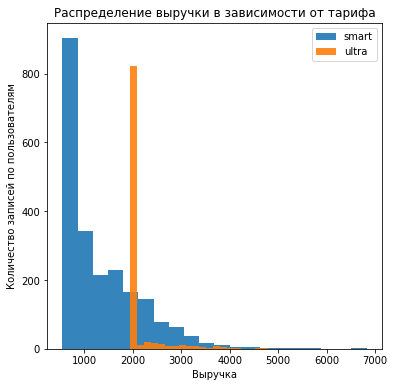

In [29]:
data2.groupby('tariff')['revenue'].hist(bins = 20, alpha = 0.9, figsize = (6,6), grid = False)
plt.title('Распределение выручки в зависимости от тарифа')
plt.legend(['smart','ultra'])
plt.xlabel('Выручка')
plt.ylabel('Количество записей по пользователям')


<div class="alert alert-danger">
    
<b> Комментарий от ревьюера</b>
    
Добавь, пожалуйста, на все графики в проекте названия, подписи осей и легенду
</div>
<div class="alert alert-info">
Добавлены названия, подписи осей и легенда ко всем графикам

</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Отлично, так графики стало намного легче читать

</div>


Text(0, 0.5, 'Количество записей по пользователям')

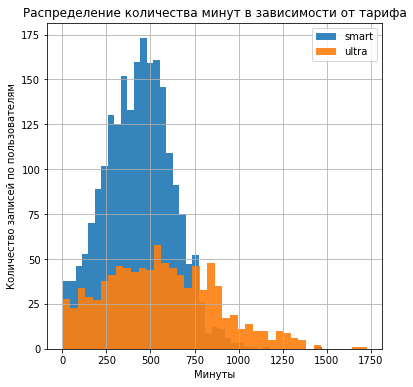

In [30]:
data2.groupby('tariff')['sum_duration'].hist(bins = 40, alpha = 0.9, figsize = (6,6))
plt.title('Распределение количества минут в зависимости от тарифа')
plt.legend(['smart','ultra'])
plt.xlabel('Минуты')
plt.ylabel('Количество записей по пользователям')

Text(0, 0.5, 'Количество записей по пользователям')

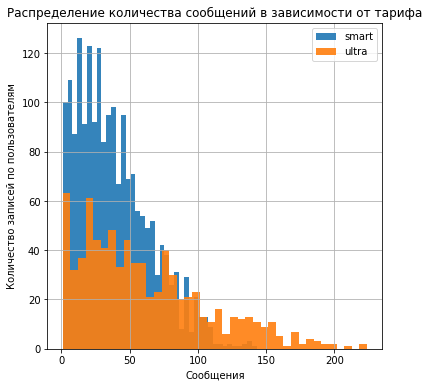

In [31]:
data2.groupby('tariff')['message_count'].hist(bins = 40, alpha = 0.9, figsize = (6,6))
plt.title('Распределение количества сообщений в зависимости от тарифа')
plt.legend(['smart','ultra'])
plt.xlabel('Сообщения')
plt.ylabel('Количество записей по пользователям')

Text(0, 0.5, 'Количество записей по пользователям')

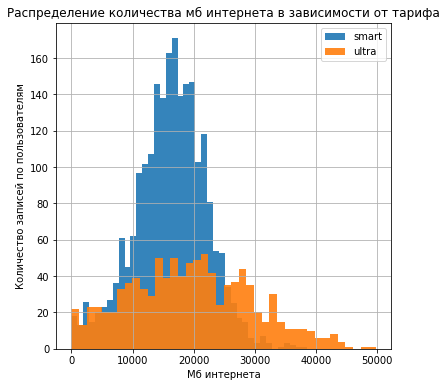

In [32]:
data2.groupby('tariff')['sum_mb_used'].hist(bins = 40, alpha = 0.9, figsize = (6,6))
plt.title('Распределение количества мб интернета в зависимости от тарифа')
plt.legend(['smart','ultra'])
plt.xlabel('Мб интернета')
plt.ylabel('Количество записей по пользователям')

**Вывод 3.2**

 - *Выручка - положительная скошенность, скошенный вправо датасет по обоим тарифам, для скошенных вправо данных медиана будет меньше среднего*
 - *Звонки - симметричный датасет*
 - *Сообщения - положительная скошенность, скошенный вправо датасет по обоим тарифам, для скошенных вправо данных медиана будет меньше среднего*
 - *Интернет - симметричный датасет*

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты хорошо справилась с анализом данных
</div>


**Проверка гипотез**
1. *средняя выручка пользователей тарифов «Ультра» и «Смарт» различается*
*Гипотеза о равенстве средних двух совокупностей: Н0 - средние равны, Н1 - средние не равны, критический уровень значимости 0.05*

In [33]:
smart = data2.loc[data2["tariff"] == 'smart', ['revenue']]
ultra = data2.loc[data2["tariff"] == 'ultra', ['revenue']]
alpha = 0.05
results = st.ttest_ind(smart,ultra)
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [nan]
Не получилось отвергнуть нулевую гипотезу


**Вывод**

- *Полученное значение p-value значительно ниже критического уровня значимости, значит нулевая гипотеза отвергается, средние не равны*

**Проверка гипотез**

2. *средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*
*Гипотеза о равенстве средних двух совокупностей: Н0 - средние равны, Н1 - средние не равны, критический уровень значимости 0.05*

In [34]:
moscow = data2.loc[data2["city"] == 'Москва', ['revenue']]
other_city = data2.loc[data2["city"] != 'Москва', ['revenue']]
alpha = 0.05
results = st.ttest_ind(moscow,other_city)
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [nan]
Не получилось отвергнуть нулевую гипотезу


**Вывод**

- *Полученное значение p-value выше критического уровня значимости, значит нулевая гипотеза не отвергается*
- *С вероятностью в 43% такое или большее различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними, то есть получается, что неважен город, в котором находится пользователь*

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, ты правильно сформулировала и проверила гипотезы
</div>

## Общий вывод

- *Произведена предобработка данных*
- *Для каждого пользователя по месяцам было посчитано: количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика*
- *На основе найденных данных была посчитана ежемесячная выручка revenue с каждого пользователя в зависимости от тарифа*
- *В среднем по тарифу ультра платят 2070 рублей, тариф стоит 1950 рублей. По тарифу смарт платят в среднем 1273 рубля, стоимость тарифа 550 рублей. То есть пользователи с тарифом смарт тратят больше дополнительных финансов*
- *Выручка по смарту с вероятностью 99% находится в промежутке (0, 3706), выручка по ультра в промежутке (932,3208)*
- *Проверка гипотез показала, что средние по тарифам не равны, выручка не зависит от того в Москве находится пользователь или в другом городе*
- *Также выручка не зависит от возраста*


- *Пользователи с тарифом смарт помимо оплаты своего основного тарифа, пользуются дополнительными звонкамии, сообщениям и интернетом, что делают намного реже пользователи тарифа ультра. Стоит оптимизиировать тариф смарт, возможно повысить цену, увеличив количество звонков, сообщений и гб интернета.*
- *Хоть на данный момент для компании может быть выгодно то, что пользователи платят дополнительные деньги, в дальнейшем это может стать негативным фактором, который приведет к потере клиентов*

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Молодец, что описала полученные результаты
</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Было бы неплохо ответить на основной вопрос исследования:  
    
    Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
</div>

<div class="alert alert-info">
Добавлены выводы

</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2</b>

Молодец, что дополнила вывод
</div>


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Спасибо за твою работу! Ты хорошо справилась с анализом данных и проверкой гипотез.

Осталось немного доработать проект:

- добавить комментарии в проект
- округлить длительность звонков и объем трафика
- изменить способ объединения таблиц
- добавить названия, подписи осей и легенду на графики

Жду твои исправления:)

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Спасибо, что учла мои комментарии. Надеюсь, эта работа была полезна для тебя. Я принимаю твой проект и желаю удачи в прохождении курса!

</div>

In [35]:
data2.head(50)

,user_id,month,count_duration,sum_duration,count_mb_used,sum_mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,dop_calls,dop_messages,dop_inet,revenue
0,1000,5,22.0,164.0,5.0,2254,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
1,1000,6,43.0,187.0,49.0,23234,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
2,1000,7,47.0,346.0,29.0,14004,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
3,1000,8,52.0,419.0,29.0,14056,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
4,1000,9,58.0,479.0,27.0,14569,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
5,1000,10,57.0,363.0,27.0,14703,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
6,1000,11,43.0,344.0,24.0,14757,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
7,1000,12,46.0,341.0,21.0,9818,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0,1950.0
8,1001,11,59.0,444.0,55.0,18430,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,3,1150.0
9,1001,12,63.0,430.0,41.0,14037,NaN,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,0,550.0


In [36]:
young = data2.loc[data2["age"] <= 25, ['revenue']]
other = data2.loc[data2["age"] > 25, ['revenue']]
alpha = 0.05
results = st.ttest_ind(young,other)
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [nan]
Не получилось отвергнуть нулевую гипотезу


In [37]:
data2['city'].value_counts()

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Сургут               6
Нижневартовск        6
Химки                5
Кемерово             5
Иваново              2
Name: city, Length: 76, dtype: int64

In [38]:
moscow = data2.loc[data2["city"] == 'Санкт-Петербург', ['revenue']]
other_city = data2.loc[data2["city"] != 'Санкт-Петербург', ['revenue']]
alpha = 0.05
results = st.ttest_ind(moscow,other_city)
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [nan]
Не получилось отвергнуть нулевую гипотезу
